## Plot Predictions

In [1]:
import pandas as pd
import prediction_painter

df_log = pd.read_csv("Log/Models.csv", index_col=0)
df_log['Model_path'] = df_log['Model_path'].apply(lambda x: x.replace('C:\\Users\\wasin\\Downloads\\Work\\PG(HKU)\\FYP\\Program_Data\\',''))

importing Jupyter notebook from Model_dev.ipynb


In [2]:
df_log.iloc[-1,]

Time                            20211028 20-45
Model_path         Models\20211028 20-45C-LSTM
Algorithm                               C-LSTM
Loss                                0.00244407
Validation Loss                      0.0629487
Country                          United States
Features                                   PCS
Name: 707, dtype: object

#### USA

##### Reshape and MinMaxScale input #####
(535, 14, 28) (535, 7, 1) (60, 14, 28) (60, 7, 1)


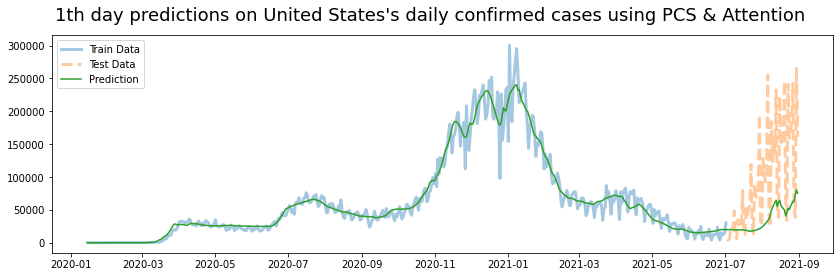

('Attention', 'Models\\20211021 02-05Attention', 'PCS', 'United States')

In [3]:
prediction_painter.plot_from_dataframe(df_log, 160)

##### Reshape and MinMaxScale input #####
(535, 14, 28) (535, 7, 1) (60, 14, 28) (60, 7, 1)


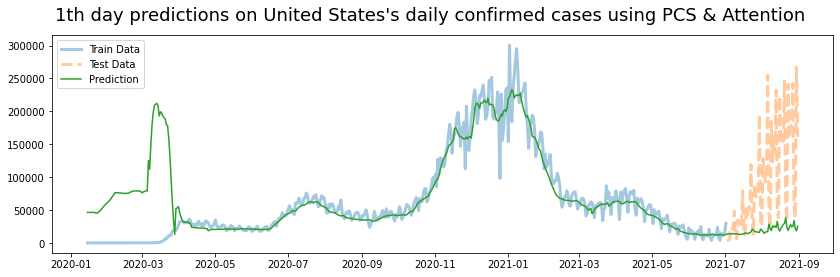

('Attention', 'Models\\20211028 20-45Attention', 'PCS', 'United States')

In [5]:
prediction_painter.plot_from_dataframe(df_log,-2)

In [64]:
prediction_painter.plot_from_dataframe(df_log, 406)

##### Reshape and MinMaxScale input #####
(535, 14, 24) (535, 7, 1) (60, 14, 24) (60, 7, 1)


d:\python37\lib\site-packages\keras\saving\saved_model\load.py:115: RuntimeWarning:

Unexpected end-group tag: Not all data was converted



AttributeError: '_UserObject' object has no attribute 'predict'

#### India

In [ ]:
prediction_painter.plot_from_dataframe(df_log, 589)

In [ ]:
prediction_painter.plot_from_dataframe(df_log, 595)

In [ ]:
prediction_painter.plot_from_dataframe(df_log, 590)

### Brazil

In [ ]:
prediction_painter.plot_from_dataframe(df_log, 482)

In [ ]:
prediction_painter.plot_from_dataframe(df_log, 488)

In [ ]:
prediction_painter.plot_from_dataframe(df_log, 520)

### Mexico

In [ ]:
prediction_painter.plot_from_dataframe(df_log, 343)

In [ ]:
prediction_painter.plot_from_dataframe(df_log, 349)

In [ ]:
prediction_painter.plot_from_dataframe(df_log, 592)

In [ ]:
import pandas as pd

df_log = pd.read_csv("Log/Models.csv", index_col=0)
df_log['Model_path'] = df_log['Model_path'].apply(lambda x: x.replace('C:\\Users\\wasin\\Downloads\\Work\\PG(HKU)\\FYP\\Program_Data\\',''))

In [ ]:
groupby_keys = ['Country', 'Algorithm', 'Features']
df_log_groupby = df_log.groupby(groupby_keys).min()[['Loss', 'Validation Loss']].reset_index()
df_log_groupby['Model'] = df_log_groupby['Algorithm'] + " + " +df_log_groupby['Features']

In [ ]:
import matplotlib.pyplot as plt 

for country in df_log_groupby.Country.unique():
    df_log_groupby[df_log_groupby['Country'] == country].sort_values('Loss').plot.bar(x = 'Model',y = 'Loss',figsize= (12,4))
    plt.title(country)
    plt.show()

In [ ]:
for country in df_log_groupby.Country.unique():
    df_log_groupby[df_log_groupby['Country'] == country].sort_values('Validation Loss').plot.bar(x = 'Model',y = 'Validation Loss',figsize= (12,4))
    plt.title(country)
    plt.show()

## Feature Importance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objects as go

In [ ]:
# ******************** install as you need
! pip install plotly
# ********************

In [2]:
countries = ['Brazil', 'India', 'Mexico', 'United States']
mid = 'Log/{}/{}_feat_importance_{}.csv'
months = ['March', 'April', 'May', 'June', 'July', 'August', 'Sept']

In [3]:
def read_feat_importance_table(country):
    """
    read feat_importance and group months
    """
    for month in months:
        if month == 'March':
            df_left = pd.read_csv(mid.format(country,country, month),index_col=0)[[]]

        df_right = pd.read_csv(mid.format(country,country, month),index_col=0)[['Ratio of new-old validation loss']]

        df_left = df_left.join(df_right)
        df_left = df_left.rename(columns={df_right.columns[-1]: month})
    return df_left

In [7]:
def plot_lines(feat_importance, country):
    fig = go.Figure()
    for intervention in feat_importance.columns:

        fig.add_trace(go.Scatter(x = feat_importance.index, 
                              y = feat_importance[intervention],
                              name = intervention ,
                              showlegend=True,
                             mode='lines'))

    fig.update_layout(template = 'plotly_white', height=800, width = 950,legend = dict(orientation='h'),
                     xaxis=dict(showline=True, showgrid=False, showticklabels=True,
                                linecolor='rgb(204, 204, 204)', linewidth=2, ticks='outside', 
                                tickfont=dict(family='Arial', size=12,color='rgb(82, 82, 82)'),
                               ),
                    yaxis=dict(showgrid=False, zeroline=False, showline=False, showticklabels=False,),
                    plot_bgcolor='white')
    # Highline the most importance for each month
    annotations = []
    nums = []
    intervs = []
    for month in months:
        num = feat_importance.T[[month]].sort_values(month, ascending=False).iloc[0,:].values[0]
        interv = feat_importance.T[[month]].sort_values(month, ascending=False).iloc[0,:].name
        nums.append(num)
        intervs.append(interv)
        annotations.append(dict(x=month, y=num,
                                          xanchor='right', yanchor='middle',
                                          text=interv + '<br> {}'.format(np.around(num,3)),
                                          font=dict(family='Arial',
                                                    size=12),
                                          showarrow=False))
    fig.add_trace(go.Scatter(x=months, y = nums, marker=dict(size=8),mode = 'markers',name='Most Important'))
    fig.update_layout(annotations=annotations, title=country)
    fig.show()

In [8]:
for country in countries:
    plot_lines(read_feat_importance_table(country).T, country)

In [20]:
def plot_importance_range(feat_importance, country, log = False):
    
    feat_importance = feat_importance.T
    feat_importance['sort'] = feat_importance.max(1)- feat_importance.min(1)
    feat_importance = feat_importance.sort_values('sort').T.iloc[:-1,]
    if log:  feat_importance = np.log(feat_importance)
    base = 0 if log else 1
    fig = go.Figure()
    for interv in feat_importance.columns:
        fig.add_trace(go.Scatter(x = [min(feat_importance[interv].max(),base),
                                     min(feat_importance[interv].min(),base)] ,mode = 'lines', y = [interv]*2,line_color = '#87AAAA',
                                 line_width = 12, opacity = .8, 
                                 name = "{} Lower Bound".format(interv)))
        fig.add_trace(go.Scatter(x = [max(feat_importance[interv].max(),base),
                                     max(feat_importance[interv].min(),base)] ,mode = 'lines', y = [interv]*2,line_color = '#000D6B',
                                 line_width = 12, opacity = .8,
                                name = "{} Upper Bound".format(interv[:2])))
    fig.update_layout(template = 'simple_white', showlegend=False, width = 900,height = 500, title = country)
    fig.show()

In [21]:
for country in countries:
    plot_importance_range(read_feat_importance_table(country).T, country, True)

In [22]:
for country in countries:
    plot_importance_range(read_feat_importance_table(country).T, country, False)